<a href="https://colab.research.google.com/github/tuntul17/Others/blob/main/FIZ463hw2p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pylab import *
import numpy as np
from scipy.signal import find_peaks

In [2]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
Wdc=  2898e-6  #WiensDisplacementConstant

In [28]:
def BB(f,T):
  B = (2*h*f**3/c**2)*1/(np.exp(h*f/(k*T)))
  return B

In [137]:
# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
freq = np.linspace(10,2*10e14,5000)
I4 = BB(freq,4000)
I5 = BB(freq,5000)
I6 = BB(freq,6000)

In [158]:
p4m = max(I4)
p5m = max(I5)
p6m = max(I6)

f4l = np.where(I4 == p4m)
f5l = np.where(I5 == p5m)
f6l = np.where(I6==p6m)

f4m = freq[f4l]
f5m = freq[f5l]
f6m = freq[f6l]

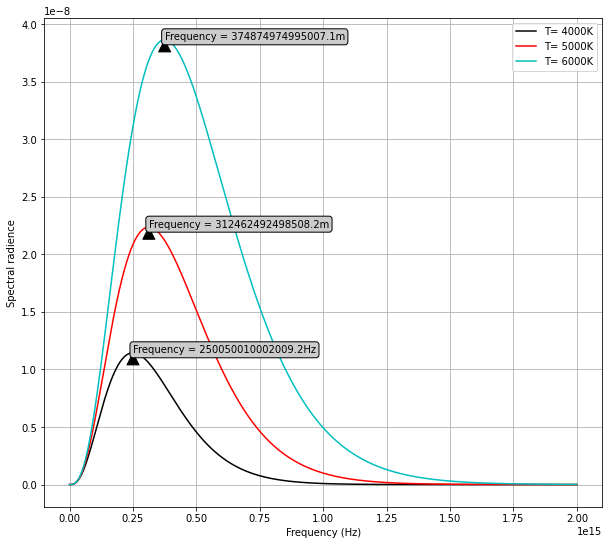

In [160]:
#plots
r = 100
w,l = 1000,900
f, ax = subplots(figsize= (w/r,l/r))

bbox = dict(boxstyle ="round", fc ="0.8")
arrowprops=dict(facecolor='black', shrink=0.05)
#general plots
plot(freq, I4, c= 'k',label='T= 4000K') #4000K black line
plot(freq, I5, c= 'r',label='T= 5000K') # 5000K red ine
plot(freq, I6, c= 'c',label='T= 6000K') # 6000K cyan line
#peak Frequencies
annotate("Frequency = %.1fHz"%f4m, xy=(f4m, p4m), xytext=(f4m,p4m),bbox = bbox,arrowprops=arrowprops,)
annotate("Frequency = %.1fm"%f5m, xy=(f5m, p5m), xytext=(f5m,p5m),bbox = bbox,arrowprops=arrowprops,)
annotate("Frequency = %.1fm"%f6m, xy=(f6m, p6m), xytext=(f6m,p6m),arrowprops=arrowprops,bbox = bbox)
xlabel('Frequency (Hz)')
ylabel('Spectral radience')
grid(True)
legend()
show()